In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
from pathlib import Path
import functions as fn
import Box
import Halo
import myRCParams

In [2]:
redshifts = [3, 2, 1, 0]
x_bins = np.logspace(-2, 0, 21)
is_normalize = True
is_verbose = True

In [3]:
x = np.sqrt(x_bins[:-1]*x_bins[1:])

--------------
z = 3
Calculating density profiles
Plotting
--------------
z = 2
Calculating density profiles
Plotting
--------------
z = 1
Calculating density profiles
Plotting
--------------
z = 0
Calculating density profiles
Plotting


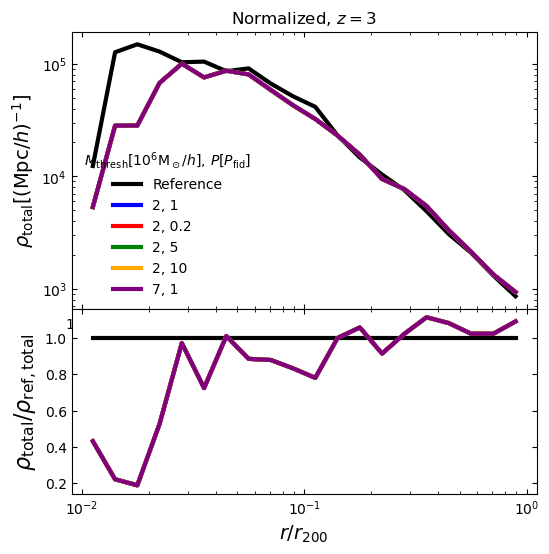

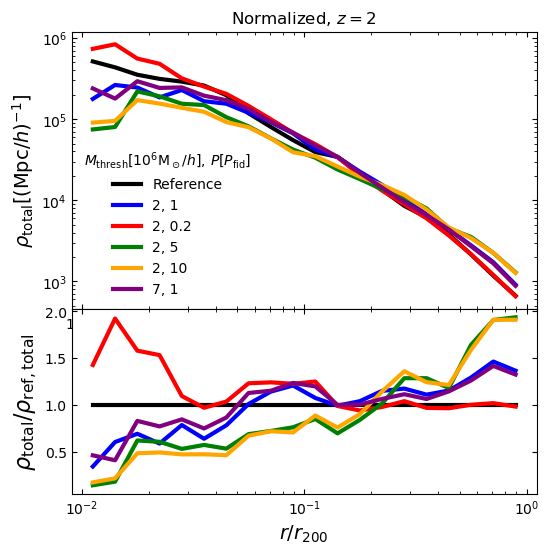

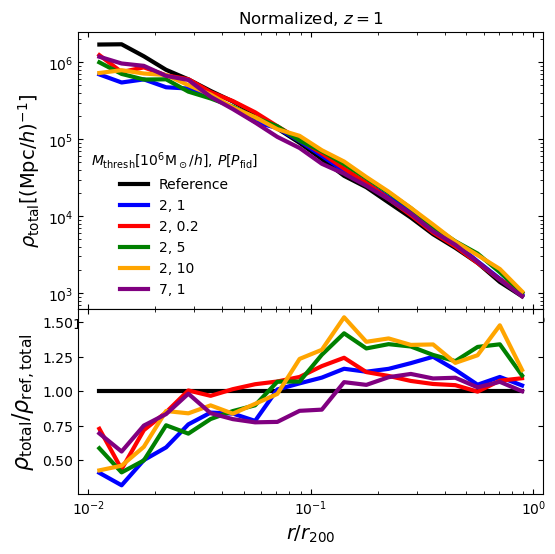

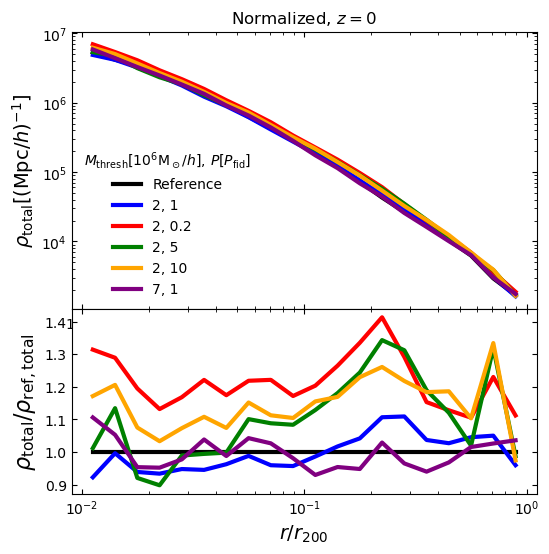

In [6]:
for z in redshifts:
    if is_verbose:
        print('--------------')
        print(f'z = {z}')
    boxes = np.array([])
    halos = np.array([])
    for model in fn.models:
        model_path = fn.models_path/model
        boxes = np.append(boxes, Box.Box(model_path, fn.zhot[z]))
        fof_path = model_path/f'fof_subhalo_tab_{fn.zhot[z]}.hdf5'
        with h5py.File(fof_path) as fof:
            halo_masses = np.array(fof.get('Group/GroupMass'))
            ndx = np.array(np.where(halo_masses == np.amax(halo_masses)))[0]
            halo_pos = np.array(fof.get('Group/GroupPos'))[ndx]
            halo_r200c = np.array(fof.get('Group/Group_R_Crit200'))[ndx]
            
        halos = np.append(halos, Halo.Halo(halo_pos, halo_r200c))
        
    if is_verbose:
        print('Calculating density profiles')

    [halo.get_density(boxes[i], x_bins) for i, halo in enumerate(halos)]

    if is_verbose:
        print('Plotting')
    
    if is_normalize:
        for i, halo in enumerate(halos):
            if fn.models[i] == 'REF':
                mass_ref = halo.mass
            halo.density *= mass_ref / halo.mass
    
    fg, ax = plt.subplots(2, gridspec_kw={'height_ratios':[3,2]})
    fg.subplots_adjust(hspace=0)
    ax[0].loglog()
    ax[1].semilogx()
    ax[1].set_xlabel(r'$r/r_{200}$')
    ax[0].set_ylabel(r'$\rho_\mathrm{total}[(\mathrm{Mpc}/h)^{-1}]$')
    ax[1].set_ylabel(r'$\rho_\mathrm{total}/\rho_\mathrm{ref, total}$', size=16)
    
    if is_normalize:
        ax[0].set_title(f'Normalized, $z={z}$')
    else:
        ax[0].set_title(f'Unnormalized, $z={z}$')
        
    for i, halo in enumerate(halos):
        if fn.models[i] == 'REF':
            density_ref = halo.density
            
        ax[0].plot(x, halo.density, lw=3, c=fn.colors[fn.models[i]], label=fn.labels[fn.models[i]])
        ax[1].plot(x, halo.density/density_ref, lw=3, c=fn.colors[fn.models[i]])
        
    ax[0].legend(title=fn.legend_title)